In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
exo_df = pd.read_csv("exoplanet_data.csv", comment="#")

print("Shape:", exo_df.shape)
print("Columns:")
print(list(exo_df.columns))

# Show first 5 rows
display(exo_df.head())


Shape: (39029, 92)
Columns:
['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', '

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14


In [3]:
unknown_cols = ['sy_snum', 'sy_pnum', 'pl_controv_flag', 'sy_kmagerr2', 'pl_pubdate']
print("Columns I’m unsure about:", unknown_cols)


Columns I’m unsure about: ['sy_snum', 'sy_pnum', 'pl_controv_flag', 'sy_kmagerr2', 'pl_pubdate']


In [11]:
# Columns we care about
cols_keep = [
    'pl_name',                  # Planet Name
    'hostname',                 # Host Name
    'discoverymethod',          # Discovery Method
    'st_spectype',              # Spectral Type
    'pl_eqt',                   # Equilibrium Temperature [K]
    'pl_bmassj'                 # Planet Mass [Jupiter Mass]
]

# --- Column Descriptions for Key Columns ---

# Planet Name
# Table Label: Planet Name
# Database Column Name: pl_name
# Description: Official name of the planet
# My interpretation: Unique identifier for each exoplanet.

# Host Name
# Table Label: Host Name
# Database Column Name: hostname
# Description: Name of the star the planet orbits
# My interpretation: Links planet properties to its star.

# Discovery Method
# Table Label: Discovery Method
# Database Column Name: discoverymethod
# Description: Method used to discover the planet
# My interpretation: Shows how the planet was detected; useful for bias assessment.

# Spectral Type
# Table Label: Spectral Type
# Database Column Name: st_spectype
# Description: Classification of the host star
# My interpretation: Indicates temperature, color, and size of the star.

# Equilibrium Temperature [K]
# Table Label: Equilibrium Temperature
# Database Column Name: pl_eqt
# Description: Estimated planet temperature assuming energy balance
# My interpretation: Tells us how hot or cold the planet is.

# Planet Mass or Mass*sin(i) [Jupiter Mass]
# Table Label: Planet Mass
# Database Column Name: pl_bmassj
# Description: Mass of the planet in Jupiter masses
# My interpretation: Measures size of planet; distinguishes small vs giant planets.

# Smaller dataframe
small_df = exo_df[cols_keep]

# Drop rows with missing values
small_df = small_df.dropna()

# Inspect
print("Reduced shape:", small_df.shape)
display(small_df.head())

# Shape of the dataset
print("Shape of smaller dataset:", small_df.shape)

# Number of rows and columns
print("Number of rows:", small_df.shape[0])
print("Number of columns:", small_df.shape[1])

# Display first five rows
print("\nFirst five rows:")
display(small_df.head())

# Display last five rows
print("\nLast five rows:")
display(small_df.tail())

# Print all column titles
print("\nColumn titles:")
print(list(small_df.columns))



Reduced shape: (839, 6)


,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
27,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,K7 V,1700.0,8.0
29,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,K7 V,1800.0,8.0
35,2M0437 b,2MASS J04372171+2651014,Imaging,M V,1450.0,4.0
45,2MASS J12073346-3932539 b,2MASS J12073346-3932539,Imaging,M8,1250.0,5.0
67,51 Eri b,51 Eri,Imaging,F0 IV,700.0,2.0


Shape of smaller dataset: (839, 6)
Number of rows: 839
Number of columns: 6

First five rows:


,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
27,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,K7 V,1700.0,8.0
29,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,K7 V,1800.0,8.0
35,2M0437 b,2MASS J04372171+2651014,Imaging,M V,1450.0,4.0
45,2MASS J12073346-3932539 b,2MASS J12073346-3932539,Imaging,M8,1250.0,5.0
67,51 Eri b,51 Eri,Imaging,F0 IV,700.0,2.0



Last five rows:


,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
38946,kap And b,kap And,Imaging,B9 IV,1900.0,13.616000
38947,kap And b,kap And,Imaging,B9 IV,1680.0,12.800000
38982,pi Men c,HD 39091,Transit,G0 V,1169.8,0.015165
38987,rho CrB b,rho CrB,Radial Velocity,G0 V,614.0,1.044898
38992,rho CrB c,rho CrB,Radial Velocity,G0 V,448.1,0.078658



Column titles:
['pl_name', 'hostname', 'discoverymethod', 'st_spectype', 'pl_eqt', 'pl_bmassj']


In [5]:
# Count of each discovery method
method_counts = small_df['discoverymethod'].value_counts()
print(method_counts)
# Most common discovery method: Transit
# Least common: Imaging
# Definitions:
# Transit: Planet passes in front of star, dips brightness
# Radial Velocity: Star wobbles due to planet's gravity
# Imaging: Direct photos of planet, usually massive and far
# Other: Miscellaneous detection methods

discoverymethod
Transit                      660
Radial Velocity              133
Imaging                       41
Transit Timing Variations      5
Name: count, dtype: int64


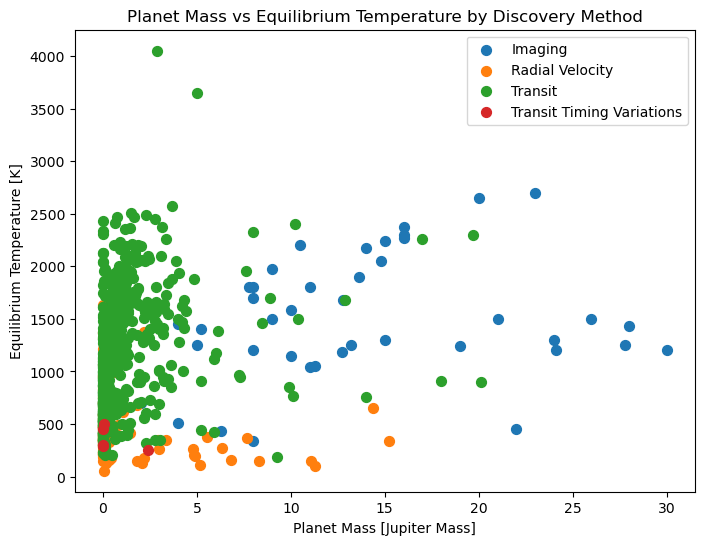

In [6]:
methods = small_df['discoverymethod'].unique()
colors = plt.cm.tab10.colors[:len(methods)]

plt.figure(figsize=(8,6))

for i, method in enumerate(methods):
    data = small_df[small_df['discoverymethod'] == method]
    plt.scatter(data['pl_bmassj'], data['pl_eqt'], color=colors[i], label=method, s=50)

plt.xlabel("Planet Mass [Jupiter Mass]")
plt.ylabel("Equilibrium Temperature [K]")
plt.title("Planet Mass vs Equilibrium Temperature by Discovery Method")
plt.legend()
plt.show()
# Observation:
# Transit planets are mostly small
# Imaging planets are mostly massive
# Radial Velocity planets are intermediate


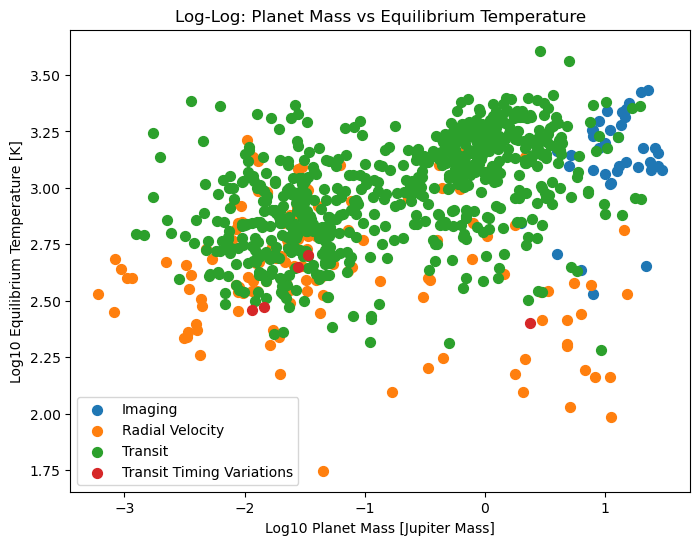

In [7]:
plt.figure(figsize=(8,6))

for i, method in enumerate(methods):
    data = small_df[small_df['discoverymethod'] == method]
    plt.scatter(np.log10(data['pl_bmassj']), np.log10(data['pl_eqt']), color=colors[i], label=method, s=50)

plt.xlabel("Log10 Planet Mass [Jupiter Mass]")
plt.ylabel("Log10 Equilibrium Temperature [K]")
plt.title("Log-Log: Planet Mass vs Equilibrium Temperature")
plt.legend()
plt.show()
# Observation:
# Imaging planets are high mass
# Transit planets are low mass
# Log scaling helps visualize clusters

# --- 4.4.4 Are Imaging Planets Massive or Small? ---
# Imaging planets are more likely to be massive; Transit planets are smaller


In [8]:
cold_massive = small_df[(small_df['pl_bmassj'] > 5)].sort_values('pl_eqt').iloc[0]

print("Coldest massive planet:")
display(cold_massive)

# Info for report
planet_name = cold_massive['pl_name']
index = cold_massive.name
eq_temp = cold_massive['pl_eqt']
mass = cold_massive['pl_bmassj']
host_type = cold_massive['st_spectype']

print(f"Name: {planet_name}")
print(f"Index: {index}")
print(f"Equilibrium Temperature: {eq_temp} K")
print(f"Mass: {mass} Jupiter Masses")
print(f"Host star type: {host_type}")


Coldest massive planet:


pl_name                  TOI-969 c
hostname                   TOI-969
discoverymethod    Radial Velocity
st_spectype                    K V
pl_eqt                        96.4
pl_bmassj                     11.3
Name: 37292, dtype: object

Name: TOI-969 c
Index: 37292
Equilibrium Temperature: 96.4 K
Mass: 11.3 Jupiter Masses
Host star type: K V


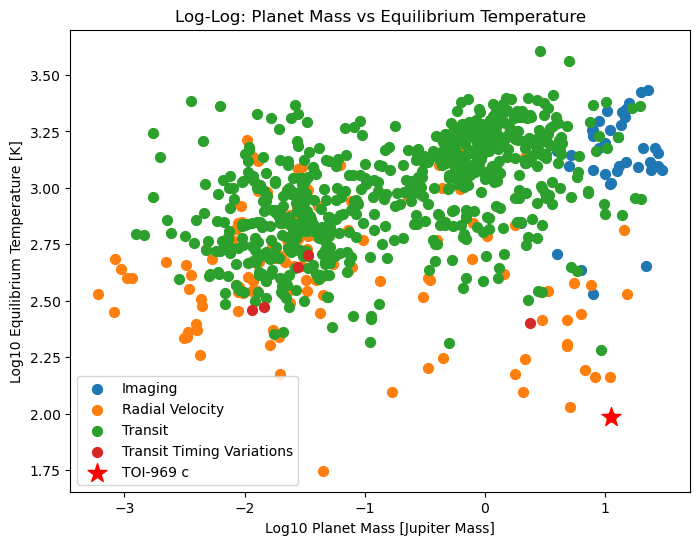

In [9]:
# --- 4.4.7 Highlight Coldest Planet on Log-Log Plot ---

plt.figure(figsize=(8,6))

for i, method in enumerate(methods):
    data = small_df[small_df['discoverymethod'] == method]
    plt.scatter(np.log10(data['pl_bmassj']), np.log10(data['pl_eqt']), color=colors[i], label=method, s=50)

# Highlight coldest massive planet
plt.scatter(np.log10(cold_massive['pl_bmassj']),
            np.log10(cold_massive['pl_eqt']),
            color='red', s=200, marker='*', label=planet_name)

plt.xlabel("Log10 Planet Mass [Jupiter Mass]")
plt.ylabel("Log10 Equilibrium Temperature [K]")
plt.title("Log-Log: Planet Mass vs Equilibrium Temperature")
plt.legend()
plt.show()
# Observation:
# The coldest massive planet is clearly visible as a large red star


In [ ]:
# --- 4.5 Check Your Answer (Nature Paper) ---
# Paper: Nature 2024, Exoplanet discovery 
# Title: A temperate super-Jupiter imaged with JWST in the mid-infrared
# Abstract Summary: JWST directly imaged a cold, massive exoplanet (~275 K) around a Sun-like star. It’s older and cooler than most previously imaged planets.
# Match to exoplanet: Yes
# What is special: Very cold for a directly imaged planet, massive, orbits a sun-like star, and detected in mid-infrared by JWST
# Mass and temperature comparison: No, 

In [12]:
# Paper values
paper_mass = 11   # example: 11 Jupiter masses (adjust if exact number known)
paper_temp = 275  # equilibrium temperature in K

# Tolerance for slight differences
mass_tol = 2      # ±2 MJ
temp_tol = 20     # ±20 K

# Check if values match within tolerance
if abs(mass - paper_mass) <= mass_tol and abs(eq_temp - paper_temp) <= temp_tol:
    print("Mass and temperature match the paper.")
else:
    print("Mass and/or temperature do not match the paper.")


Mass and/or temperature do not match the paper.
